# PrepIgramStack.py 

This is the first step of GIAnT processing. This step requires 3 inputs:

1. **example.rsc** - ROI_PAC metadata file 

2. **ifg.list** - List of interferograms 

3. **prepdataxml.py** - Script to setup XML file to describe data formats

4. **userfn.py** - Functions to map dates to files on disk

We will walk through each of these in detail in this notebook and run **PrepIgramStack.py** after setting up the inputs.

In [2]:
cd /home/jovyan/work/notebooks/TimeSeries/GRFN/GIAnT

/home/jovyan/work/notebooks/TimeSeries/GRFN/GIAnT


## 1. example.rsc

**example.rsc** is a simple key-value pair text file with metadata in ROI_PAC rsc format. Let's take a look.

In [3]:
!cat example.rsc

WIDTH     1800
FILE_LENGTH 1620
HEADING_DEG  -12.0 
WAVELENGTH   0.031228381041666666
CENTER_LINE_UTC   43200


Shown above is the bare minimum rsc file needed to process data with GIAnT.

## 2. ifg.list

**ifg.list** is simple four-column text file in the format

|primary-yyyymmdd | secondary-yyyymmdd | bperp | sensor name|
-----------------------------------------------------

We generated this file as part of the **PrepGIAnT** notebook. Let's take a look at it.

In [2]:
!cat ifg.list

20180423  20180330  0.0  S1
20180423  20180411  0.0  S1
20180505  20180411  0.0  S1
20180517  20180423  0.0  S1
20180505  20180423  0.0  S1
20180517  20180505  0.0  S1
20180529  20180505  0.0  S1
20180517  20180511  0.0  S1
20180604  20180511  0.0  S1
20180529  20180511  0.0  S1
20180610  20180517  0.0  S1
20180604  20180517  0.0  S1
20180529  20180517  0.0  S1
20180529  20180523  0.0  S1
20180610  20180523  0.0  S1
20180604  20180523  0.0  S1
20180604  20180529  0.0  S1
20180610  20180529  0.0  S1
20180610  20180604  0.0  S1


### Some comments

1. For this exercise, we are not going to use the baseline information for estimating the time-series. Hence, we have set it to 0.0. 

2. We are also using data from a single sensor. Hence, we have picked **S1** as our sensor name. One should use different sensor names if combining data from different instruments.

3. Dates can also be supplied in yymmdd format, where it is assumed that the date is after the year 2000. It's best to use 4 digits for the year.

## 3. prepdataxml.py 

GIAnT is designed to use XML files as inputs. However, to make things easier for the users, a python utility has been provided to generate the XML input files. We use one such utility to generate the input XML file.

Let's take a look at the **prepdataxml.py** file and understand the inputs that are being set. 

In [4]:
#Look at the python script
!cat prepdataxml.py


#!/usr/bin/env python

import tsinsar as ts
import argparse
import numpy as np

if __name__ == '__main__':

    ######Prepare the data.xml
    g = ts.TSXML('data')
    g.prepare_data_xml('example.rsc', proc='RPAC',
                       xlim=[0,1800], ylim=[0, 1620],        ##Assuming no cropping
                       rxlim = [740,744], rylim=[553,557], ##Reference region 
                       latfile='', lonfile='', hgtfile='', ##Needed only for tropospheric corrections
                       inc = 21., cohth=0.3, chgendian='False',  ## Coherence thresholds
                       unwfmt='GRD', corfmt='GRD',         ##Read data using GDAL
                       mask='watermask.flt')         ##Only needed if mask file is used
    g.writexml('data.xml')


In [6]:
#Run the python script
!python prepdataxml.py

logger - INFO - GIANT Toolbox - v 1.0
logger - INFO - ---------------------
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
prepare_data_xml - INFO - Using ROI-PAC products.
addsubelement - INFO - Creating Field: proc , Value=RPAC, Type=STR
addsubelement - INFO - Creating Field: width , Value=1800, Type=INT
addsubelement - INFO - Creating Fi

In [7]:
#Look at the output
!cat data.xml

<data>
  <proc>
    <value>RPAC</value>
    <type>STR</type>
    <help>Processor used for generating the interferograms.</help>
  </proc>
  <master>
    <width>
      <value>1800</value>
      <type>INT</type>
      <help>WIDTH of the IFGs to be read in.</help>
    </width>
    <file_length>
      <value>1620</value>
      <type>INT</type>
      <help>FILE_LENGTH of the IFGS to be read in.</help>
    </file_length>
    <wavelength>
      <value>0.0312283810417</value>
      <type>FLOAT</type>
      <help>WAVELENGTH of the Stack. If combining sensors,ensure that they are all converted to same units.</help>
    </wavelength>
    <heading>
      <value>-12.0</value>
      <type>FLOAT</type>
      <help>Heading of the satellite in degrees. Manually adjust for Doris.</help>
    </heading>
    <utc>
      <value>43200</value>
      <type>INT</type>
      <help>Average time of acquisition in seconds of the day</help>
    </utc>
    <mask>
      <value>watermask.flt</value>
      <type>STR</ty

You will see that the **data.xml** has been populated with more fields than what you had set. This is a deliberate choice to document all the parameters that were used in the processing - default values in the software are subject to change.

Here is a list of all keywords that can be set in the data XML file.

<table border=10 bordercolor="black">
    <thead>
        <tr>
            <td>Parameter</td><td>Type</td><td>Description</td><td>Default</td><td>Comment</td>
        </tr>
    </thead>
    <tr>
        <td>proc</td><td>str</td><td>Processor. One of RPAC, ISCE, GMTSAR or DORIS.</td><td>RPAC</td><td>RPAC is the simplest and most tested.</td>
    </tr>
    <tr>
        <td>looks</td><td>int</td><td>Number of additional looks</td><td>1</td><td>Best done outside of GIAnT</td>         </tr>
    <tr>
        <td>cohth</td><td>float</td><td>Coherence threshold</td><td>0.0</td><td>One threshold for all interferograms</td>
    </tr>
    <tr>
        <td colspan="5"><u>Formats</u></td>
    </tr>
    <tr>
        <td>corfmt</td><td>str</td><td>Format of coherence files</td><td>RMG</td><td>Can be FLT/RMG/GRD</td>
    </tr>
    <tr>
        <td>unwfmt</td><td>str</td><td>Format of unwrapped files</td><td>RMG</td><td>Can be FLT/RMG/GRD</td>
    </tr>
    <tr>
        <td>mask</td><td>str</td><td>Common mask file name.</td><td>None</td><td>Needs to be flat binary</td>
    </tr>
    <tr>
        <td>masktype</td><td>str</td><td>Data type of mask file</td><td>f4</td><td>Any numpy supported type</td>
    </tr>
    <tr>
        <td colspan="5"><u>Region to process</u></td>
    </tr>
    <tr>
        <td>xmin</td><td>int</td><td>First pixel to process (python-index)</td><td>None</td><td>Best to crop outside GIAnT </td>
    </tr>
    <tr>
        <td>xmax</td><td>int</td><td>Last pixel to process (python-index)</td><td>None</td><td>Best to crop outside GIAnT </td>
    </tr>
    <tr>
        <td>ymin</td><td>int</td><td>First line to process (python-index)</td><td>None</td><td>Best to crop outside GIAnT </td>
    </tr>
    <tr>
        <td>ymax</td><td>int</td><td>Last line to process (python-index)</td><td>None</td><td>Best to crop outside GIAnT </td>
    </tr>
    <tr>
        <td colspan="5"><u>Reference region</u></td>
    </tr>
    <tr>
        <td>rxmin</td><td>int</td><td>First pixel of reference region (python-index)</td><td>None</td><td>Pick a coherent region </td>
    </tr>
    <tr>
        <td>rxmax</td><td>int</td><td>Last pixel of reference region (python-index)</td><td>None</td><td>Pick a coherent region</td>
    </tr>
    <tr>
        <td>rymin</td><td>int</td><td>First line of reference region (python-index)</td><td>None</td><td>Pick a coherent region</td>
    </tr>
    <tr>
        <td>rymax</td><td>int</td><td>Last line of reference region (python-index)</td><td>None</td><td>Pick a coherent region</td>
    </tr>
    <tr>
        <td colspan="5"><u>Inputs for tropospheric corrections</u></td>
    </tr>
    <tr>
        <td>latfile</td><td>str</td><td>Pixel-by-pixel latitude file</td><td>None</td><td>Only used for troposphere correction</td>
    </tr>
    <tr>
        <td>lonfile</td><td>str</td><td>Pixel-by-pixel longitude file</td><td>None</td><td>Only used for troposphere correction</td>
    </tr>
    <tr>
        <td>hgtfile</td><td>str</td><td>Pixel-by-pixel height file</td><td>None</td><td>Only used for troposphere correction</td>
    </tr>
    <tr>
        <td>demfmt</td><td>str</td><td>Height file format</td><td>RMG</td><td>Can be FLT/RMG/GRD</td>
    </tr>
    <tr>
        <td>inc</td><td>str/float</td><td>Pixel-by-pixel incidence angle file/ constant</td><td>23.0</td><td>Only used for troposphere correction</td>
    </tr>
    <tr>
        <td colspan="5"><u>Output directory structure</u></td>
    </tr>
    <tr>
        <td>h5dir</td><td>str</td><td>Directory in which HDF5 files will be created</td><td>./Stack</td><td>Use defaults when possible</td>
    </tr>
    <tr>
        <td>atmosdir</td><td>str</td><td>Directory where weather model data is stored</td><td>./Atmos</td><td>Use defaults when possible</td>
    </tr>
    <tr>
        <td>figsdir</td><td>str</td><td>Directory where thumbnails are generated</td><td>./Figs</td><td>Use defaults when possible</td>
    </tr>
</table>
        

## 4. userfn.py 

**userfn.py** is a mechanism to communicate the mapping between dates of an interferometric pair and the corresponding file names on disk. Let's take a look at the **userfn.py** generated in the PrepGIAnT notebook.

In [8]:
!cat userfn.py


#!/usr/bin/env python
import os 

def makefnames(dates1, dates2, sensor):
    dirname = '../aligned_insar'
    root = os.path.join(dirname, dates1+'_'+dates2)
    unwname = root+'_unw.vrt'
    corname = root+'_cor.vrt'
    return unwname, corname


We now have all the 3 inputs ready for use. Let's go ahead and run **PrepIgramStack.py**

## Run PrepIgramStack.py

In [ ]:
!PrepIgramStack.py

logger - INFO - GIANT Toolbox - v 1.0
logger - INFO - ---------------------
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
<module> - INFO - Number of interferograms = 19
<module> - INFO - Number of unique SAR scenes = 10
<module> - INFO - Number of connected components in network: 1
<module> - INFO - Output h5file: Stack/RAW-STACK.h5
<modu

## Looking at the outputs

In [9]:
##List contents 
!ls -ltr 

total 11424
-rw-r--r-- 1 jovyan users      532 Aug 15 06:25 ifg.list
-rw-r--r-- 1 jovyan users      110 Aug 15 06:25 example.rsc
-rw-r--r-- 1 jovyan users      248 Aug 15 06:26 userfn.py
-rw-r--r-- 1 jovyan users 11664000 Aug 15 06:26 watermask.flt
-rw-r--r-- 1 jovyan users      767 Aug 15 06:26 prepdataxml.py
-rw-r--r-- 1 jovyan users      643 Aug 15 06:26 prepsbasxml.py
-rw-r--r-- 1 jovyan users      451 Aug 15 06:29 userfn.pyc
-rw-r--r-- 1 jovyan users     5554 Aug 15 06:30 data.xml
drwxr-sr-x 3 jovyan users       28 Aug 15 06:30 Figs
drwxr-sr-x 2 jovyan users       34 Aug 15 06:30 Stack


In [10]:
##List contents of Stack
!ls Stack/*

Stack/RAW-STACK.h5


In [12]:
##List contents of Figs
!ls Figs

Igrams


In [13]:
!ls Figs/Igrams

I001-20180423-20180330-S1.png  I011-20180610-20180517-S1.png
I002-20180423-20180411-S1.png  I012-20180604-20180517-S1.png
I003-20180505-20180411-S1.png  I013-20180529-20180517-S1.png
I004-20180517-20180423-S1.png  I014-20180529-20180523-S1.png
I005-20180505-20180423-S1.png  I015-20180610-20180523-S1.png
I006-20180517-20180505-S1.png  I016-20180604-20180523-S1.png
I007-20180529-20180505-S1.png  I017-20180604-20180529-S1.png
I008-20180517-20180511-S1.png  I018-20180610-20180529-S1.png
I009-20180604-20180511-S1.png  I019-20180610-20180604-S1.png
I010-20180529-20180511-S1.png


### Exploring contents of the HDF5 file from command line

In [18]:
##Using HDF5 tools
!h5ls Stack/RAW-STACK.h5

Jmat                     Dataset {19, 10}
bperp                    Dataset {19}
cmask                    Dataset {1620, 1800}
dates                    Dataset {10}
igram                    Dataset {19, 1620, 1800}
tims                     Dataset {10}
usat                     Dataset {10}


In [19]:
##More verbose
!h5ls -v Stack/RAW-STACK.h5

Opened "Stack/RAW-STACK.h5" with sec2 driver.
Jmat                     Dataset {19/19, 10/10}
    Attribute: help scalar
        Type:      variable-length null-terminated ASCII string
        Data:  "Connectivity matrix [-1,1,0]"
    Location:  1:244950416
    Links:     1
    Storage:   1520 logical bytes, 1520 allocated bytes, 100.00% utilization
    Type:      native double
bperp                    Dataset {19/19}
    Attribute: help scalar
        Type:      variable-length null-terminated ASCII string
        Data:  "Array of baseline values."
    Location:  1:244950144
    Links:     1
    Storage:   152 logical bytes, 152 allocated bytes, 100.00% utilization
    Type:      native double
cmask                    Dataset {1620/1620, 1800/1800}
    Attribute: help scalar
        Type:      variable-length null-terminated ASCII string
        Data:  "Common mask for pixels."
    Location:  1:1528
    Links:     1
    Storage:   23328000 logical bytes, 23328000 allocated bytes, 100.

In [20]:
##Using gdal
!gdalinfo Stack/RAW-STACK.h5

Driver: HDF5/Hierarchical Data Format Release 5
Files: Stack/RAW-STACK.h5
Size is 512, 512
Coordinate System is `'
Metadata:
  bperp_help=Array of baseline values.
  cmask_help=Common mask for pixels.
  dates_help=Ordinal values of SAR acquisition dates.
  help=All the raw data read from individual interferograms into a single location for fast access.
  igram_help=Unwrapped IFGs read straight from files.
  Jmat_help=Connectivity matrix [-1,1,0]
  tims_help= Array of SAR acquisition times.
Subdatasets:
  SUBDATASET_1_NAME=HDF5:"Stack/RAW-STACK.h5"://Jmat
  SUBDATASET_1_DESC=[19x10] //Jmat (64-bit floating-point)
  SUBDATASET_2_NAME=HDF5:"Stack/RAW-STACK.h5"://cmask
  SUBDATASET_2_DESC=[1620x1800] //cmask (64-bit floating-point)
  SUBDATASET_3_NAME=HDF5:"Stack/RAW-STACK.h5"://igram
  SUBDATASET_3_DESC=[19x1620x1800] //igram (32-bit floating-point)
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  512.0)
Upper Right (  512.0,    0.0)
Lower Right (  512.0,  512.0)
C

### Working with HDF5 file in Python

In [21]:
import h5py

/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/opt/conda/envs/python2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p


In [24]:
##Example of working with h5py
fid = h5py.File('Stack/RAW-STACK.h5', 'r')

for ds in fid.keys():
    print(ds, fid[ds].shape, fid[ds].dtype, fid[ds].attrs['help'])
    
fid.close()

(u'Jmat', (19, 10), dtype('<f8'), 'Connectivity matrix [-1,1,0]')
(u'bperp', (19,), dtype('<f8'), 'Array of baseline values.')
(u'cmask', (1620, 1800), dtype('<f8'), 'Common mask for pixels.')
(u'dates', (10,), dtype('<f8'), 'Ordinal values of SAR acquisition dates.')
(u'igram', (19, 1620, 1800), dtype('<f4'), 'Unwrapped IFGs read straight from files.')
(u'tims', (10,), dtype('<f8'), ' Array of SAR acquisition times.')
(u'usat', (10,), dtype('S16'), 'Satellite sensor name for each SAR acquisition.')


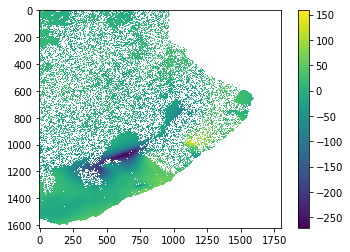

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

##Extracting arrays
fid = h5py.File('Stack/RAW-STACK.h5', 'r')

#Access to array. Does not copy it over like matlab
igram = fid['igram']

###Data accessed only when slicing provided
data = igram[3,:,:]

fid.close()

plt.figure()
plt.imshow(data)
plt.colorbar();

A good tutorial for getting started with h5py can be found here: http://docs.h5py.org/en/latest/quick.html#core-concepts

### We have now prepared our datacube for analysis. Move on to the next step ...